In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
import sqlalchemy

%reload_ext sql

engine = sqlalchemy.create_engine('postgresql://millbr02:@localhost/movies')

/usr/local/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/usr/local/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [6]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [7]:
release_dates = pd.read_sql('release_date',engine)
release_dates.head()

,title,year,country,date,month,day,dow
0,Meteor,1979,Japan,1979-10-27,10,27,5
1,Meteor,1979,Norway,1979-11-27,11,27,1
2,Meteor,1979,Spain,1979-12-01,12,1,5
3,Meteor,1979,Australia,1979-12-20,12,20,3
4,Meteor,1979,Finland,1979-12-21,12,21,4


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

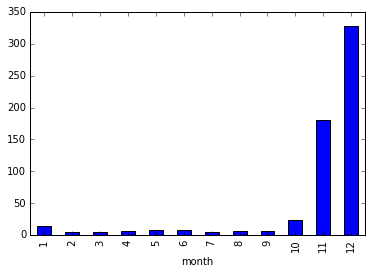

In [8]:
xmas = release_dates[(release_dates['title'].str.contains('Christmas'))].groupby('month').size()
xmas.plot(kind='bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

In [9]:
hob = release_dates[(release_dates['title'].str.startswith('The Hobbit'))].groupby('month').size()

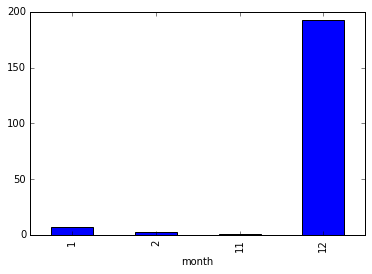

In [10]:
hob.plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

In [11]:
romance = release_dates[(release_dates['title'].str.contains('Romance'))].groupby('dow').size()

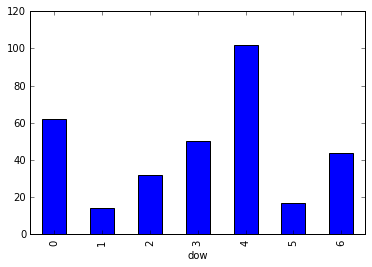

In [12]:
romance.plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

In [13]:
BOOM = release_dates[(release_dates['title'].str.contains('Action'))].groupby('dow').size()

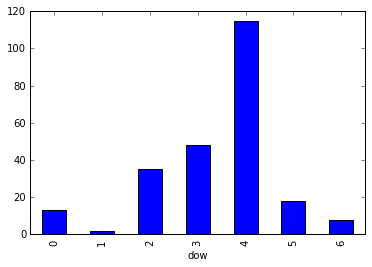

In [14]:
BOOM.plot(kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [26]:
Judi = pd.merge(release_dates, cast, left_on=['title','year'], right_on=['title','year'])

In [27]:
Judie = Judi[(Judi.name == 'Judi Dench')]
Judie.keys()

Index(['title', 'year', 'country', 'date', 'month', 'day', 'dow', 'name',
       'type', 'character', 'n'],
      dtype='object')

In [35]:
Judie['Decade'] = Judie.year // 10 * 10
Judie[(Judie.Decade == 1990) & (Judie.country == 'USA')][['title','date']].sort_values('date')

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,title,date
13563930,GoldenEye,1995-11-17
14938264,Jack & Sarah,1996-03-22
13829542,Hamlet,1996-12-25
390691,Mrs Brown,1997-07-18
7367617,Tomorrow Never Dies,1997-12-19
2804238,Shakespeare in Love,1999-01-08
3988967,Tea with Mussolini,1999-05-14
7112232,The World Is Not Enough,1999-11-19


### In which months do films with Judi Dench tend to be released in the USA?

In [38]:
Judie = Judie[(Judie.country == 'USA')]
Judie = Judie.groupby('month').size()

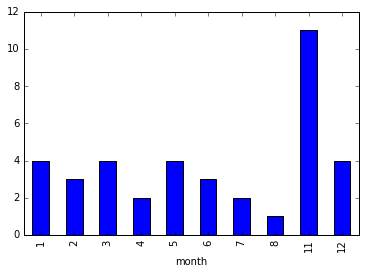

In [39]:
Judie.plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

In [40]:
Tom = pd.merge(release_dates, cast, left_on=['title','year'], right_on=['title','year'])

In [42]:
Tom = Tom[(Tom.name == 'Tom Cruise') & (Tom.country == 'USA')]
Tom = Tom.groupby('month').size()

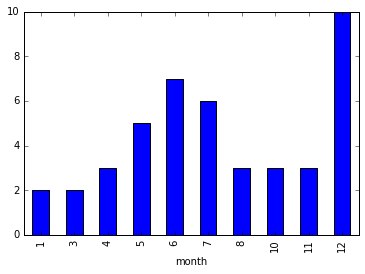

In [43]:
Tom.plot(kind='bar')